<div style="border:solid Chocolate 2px; padding: 40px">

<b>Ольга, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю посмотрить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Введение есть, супер)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# данные отображаются в усечённом варианте - для наглядности зададим отображение всех столбцов
pd.set_option('display.max_columns', None)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично)

In [5]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

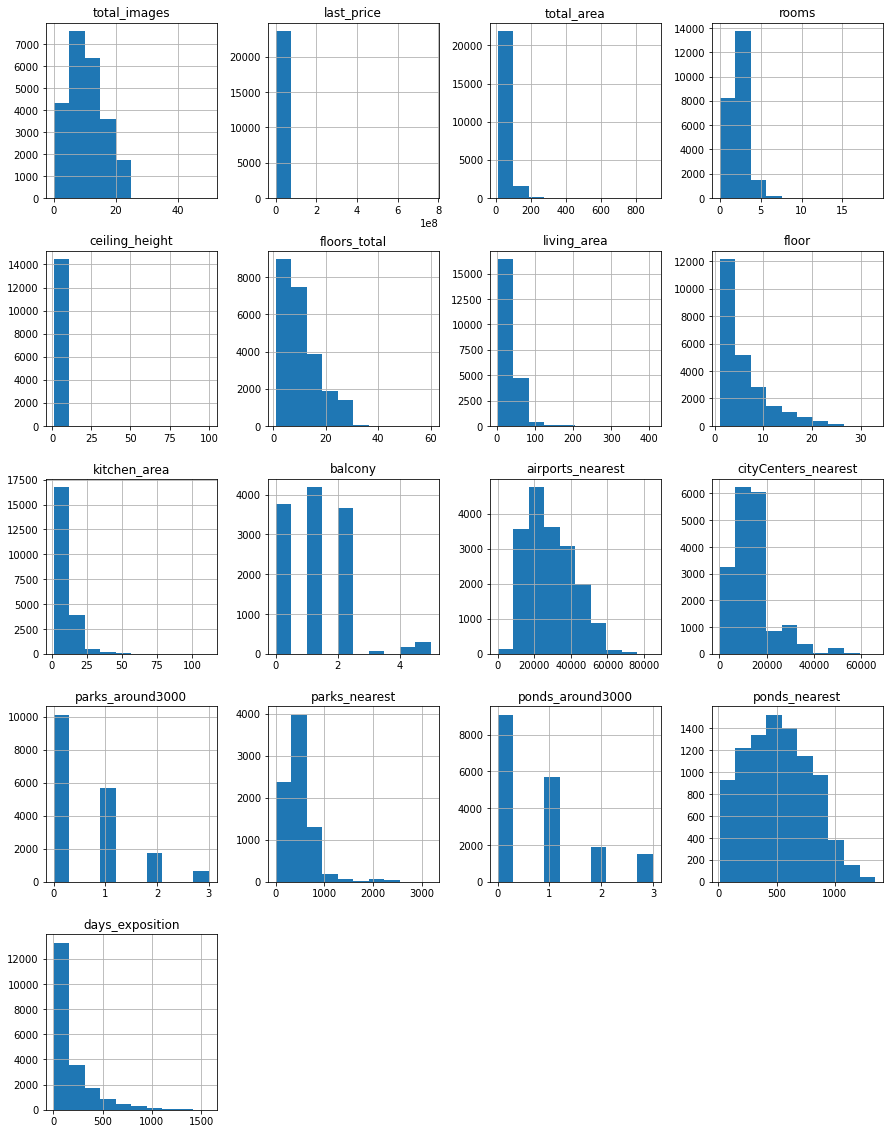

In [6]:
data.hist(figsize=(15, 20))

Вывод:
- Неправдоподобных данных мало по сравнению с правдоподобными.
- На первый взгляд много пропусков
- Есть выбросы

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Хорошо, но что у нас с дубликатами?

### Предобработка данных

Приведем названия столбцов в порядок и поработаем с данным

In [7]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [8]:
# Переименуем столбцы
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
data.set_axis(cols, axis='columns', inplace=True)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отлично! Но помнишь, что у нас также есть команда rename?

In [9]:
# Убедимся, что столбцы переименованы
data.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [10]:
# Посмотрим на пропуски
data.isnull().sum().sort_values()

total_images                      0
is_open_plan                      0
floor                             0
number_of_rooms                   0
is_studio                         0
total_area_m2                     0
last_price                        0
first_day_exposition              0
town_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

In [11]:
# Посмотрим теперь в процентах
# Очень много пропусков
# Но люди могут не знать метры до объектов
# Или высота потолков не обязательна к заполнению
data.isnull().sum().sort_values() / data.shape[0] * 100

total_images                   0.000000
is_open_plan                   0.000000
floor                          0.000000
number_of_rooms                0.000000
is_studio                      0.000000
total_area_m2                  0.000000
last_price                     0.000000
first_day_exposition           0.000000
town_name                      0.206760
total_floors_in_house          0.362885
living_area_m2                 8.029875
kitchen_area_m2                9.612220
days_exposition               13.422507
ponds_number_within_3km       23.283683
parks_numbers_within_3km      23.283683
city_center_distance_m        23.287902
nearest_airport_distance_m    23.384953
ceiling_height_m              38.799105
number_of_balconies           48.605426
nearest_pond_distance_m       61.559559
nearest_park_distance_m       65.909954
is_apartment                  88.290645
dtype: float64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер, это важно

In [12]:
# Изменим порядок столбцов для удобства
data = data[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [13]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,False,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,False,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,False,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,False,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,False,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [14]:
# Посмотрим на город
len(data['town_name'].unique())

365

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Все, что ты зарешетила прям в коде, можно смело писать комментами в markdowm здесь ;)

In [15]:
# Точно есть проблема с буквой Ё
# Может есть ПГТ и деревня с одним названием (но может, и дубли)
# Уточнить возможности нет - ничего с данными строками не делаем
data['town_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [16]:
# Заменим ё на е
data['town_name'] = data['town_name'].str.replace('ё', 'е', regex=True)

In [17]:
# Переведём всё в нижний регистр
data['town_name'] = data['town_name'].str.lower()

In [18]:
# Убрали 34 дубля
len(data['town_name'].unique())

331

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер! ИЗбавились от нескольких десятков неявных дублей

In [19]:
data['town_name'].isna().sum()

49

In [20]:
# Удалим строки без города, они будут мешать в анализе
# Объявления без города - считаем невалидными с точки зрения пользователя
data = data.dropna(subset=['town_name'])

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Можно, главное не забыть, что можем удалять не более 10% от исходного датафрейма ;)

In [21]:
# Проверим результат
data['town_name'].isna().sum()

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                2760 non-null   object 
 10  is_studio                   23650 non-null  bool   
 11  is_open_plan                23650 non-null  bool   
 12  total_images                23650 non-null  int64  
 13  last_price                  236

In [23]:
# Разберемся с маркерами студии, апартаментов и открытой планировки
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [24]:
# Nan заменим на False, так как это объекты жилового фонда
# В целом немного данных, возможно, связано с необязательностью поля
# Или люди не знают, что такое апартаменты
data['is_apartment'] = data['is_apartment'].fillna(0)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно)

In [25]:
print(data[['is_apartment', 'is_studio', 'is_open_plan']])

      is_apartment  is_studio  is_open_plan
0                0      False         False
1                0      False         False
2                0      False         False
3                0      False         False
4                0      False         False
...            ...        ...           ...
23694            0      False         False
23695            0      False         False
23696            0      False         False
23697            0      False         False
23698            0      False         False

[23650 rows x 3 columns]


In [26]:
# Изменим тип данных на bool для соответствия остальным признакам
# (исходные данные непоказательны - всего 50 значений заполнено)
data['is_apartment'] = data['is_apartment'].astype('bool')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Кстати, здесь можно не в bool переводить, а прям в int, тогда ты будешь работать с 0 и 1, а не с true or false

In [27]:
print(data[['is_apartment', 'is_studio', 'is_open_plan']])

       is_apartment  is_studio  is_open_plan
0             False      False         False
1             False      False         False
2             False      False         False
3             False      False         False
4             False      False         False
...             ...        ...           ...
23694         False      False         False
23695         False      False         False
23696         False      False         False
23697         False      False         False
23698         False      False         False

[23650 rows x 3 columns]


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         12137 non-null  float64
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                23650 non-null  bool   
 10  is_studio                   23650 non-null  bool   
 11  is_open_plan                23650 non-null  bool   
 12  total_images                23650 non-null  int64  
 13  last_price                  236

In [29]:
# Посмотрим, что там с балконами
data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [30]:
# Заменим пропуски на 0 и изменит тип данных на int
data['number_of_balconies'] = data['number_of_balconies'].fillna(0).astype('int')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Не хватает комментария: почему можно заполнять именно так?

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   town_name                   23650 non-null  object 
 1   total_area_m2               23650 non-null  float64
 2   living_area_m2              21752 non-null  float64
 3   kitchen_area_m2             21381 non-null  float64
 4   ceiling_height_m            14490 non-null  float64
 5   number_of_rooms             23650 non-null  int64  
 6   number_of_balconies         23650 non-null  int64  
 7   floor                       23650 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                23650 non-null  bool   
 10  is_studio                   23650 non-null  bool   
 11  is_open_plan                23650 non-null  bool   
 12  total_images                23650 non-null  int64  
 13  last_price                  236

In [32]:
# Посмотрим на итоговое количество пропусков
data.isna().sum()

town_name                         0
total_area_m2                     0
living_area_m2                 1898
kitchen_area_m2                2269
ceiling_height_m               9160
number_of_rooms                   0
number_of_balconies               0
floor                             0
total_floors_in_house            85
is_apartment                      0
is_studio                         0
is_open_plan                      0
total_images                      0
last_price                        0
first_day_exposition              0
days_exposition                3180
city_center_distance_m         5511
nearest_airport_distance_m     5534
parks_numbers_within_3km       5510
nearest_park_distance_m       15586
ponds_number_within_3km        5510
nearest_pond_distance_m       14565
dtype: int64

Из того, что я вижу по пропускам:

- living_area_m2, kitchen_area_m2 - не помешает нам сделать выводы, поскольку пропусков довольно мало и общие тенденции по выборке будут понятны
- ceiling_height_m - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали. Заполним их средним значением в 2.7 м - относительный "стандарт"
- total_floors_in_house - не повлияет на выводы, оставляем, как есть
- days_exposition - довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже (отсюда и продажи квартиры в несколько лет). Здесь "среднее"/"медиана" не подойдут, поэтому оставляем этот столбец, как есть
- city_center_distance_m, nearest_airport_distance_m -  данные рассчитывала система (скорее всего по координатам в каком - либо радиусе). Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего - отталкиваясь от этого, пропуски предлагаю не трогать
- parks_numbers_within_3km, nearest_park_distance_m, ponds_number_within_3km, nearest_pond_distance_m - вполне возможно, что данные просто не были выгружены системой. Учитывая, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски (есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез)

Вывод: данные достаточно "грязные" - тем не менее, общие тенденции можно будет проследить

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> ПОзволю себе немного подскзаать: living_area_m2, kitchen_area_m2 можно заполнить через поиск отношения площади кухни/жилой площади и аппроксимации на пропущенные значения. По ceiling_height_m требуется пояснение - как ты вычислила это среднее значение? Нашла в интернете? Или вычислила здесь? days_exposition можно дополнительно исследовать: ниже ты добавила столбец с годом публикации объявления, так вот посмотри как пропуски распредлились по годам, возможно там будет какой-либо овтет

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> В остальном все верно)

In [33]:
# Заполним "относительным стандартом"
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(2.7)
data.isna().sum()

town_name                         0
total_area_m2                     0
living_area_m2                 1898
kitchen_area_m2                2269
ceiling_height_m                  0
number_of_rooms                   0
number_of_balconies               0
floor                             0
total_floors_in_house            85
is_apartment                      0
is_studio                         0
is_open_plan                      0
total_images                      0
last_price                        0
first_day_exposition              0
days_exposition                3180
city_center_distance_m         5511
nearest_airport_distance_m     5534
parks_numbers_within_3km       5510
nearest_park_distance_m       15586
ponds_number_within_3km        5510
nearest_pond_distance_m       14565
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [34]:
# Добавим цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area_m2']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [35]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00


In [36]:
# Теперь ко дню публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [37]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   town_name                   23650 non-null  object        
 1   total_area_m2               23650 non-null  float64       
 2   living_area_m2              21752 non-null  float64       
 3   kitchen_area_m2             21381 non-null  float64       
 4   ceiling_height_m            23650 non-null  float64       
 5   number_of_rooms             23650 non-null  int64         
 6   number_of_balconies         23650 non-null  int64         
 7   floor                       23650 non-null  int64         
 8   total_floors_in_house       23565 non-null  float64       
 9   is_apartment                23650 non-null  bool          
 10  is_studio                   23650 non-null  bool          
 11  is_open_plan                23650 non-null  bool      

In [39]:
# Добавим столбцы c днем, месяцем и годом
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [40]:
# Теперь здесь порядок
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter,day_of_week_exposition,month_exposition,year_exposition
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37,Thursday,March,2019
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79,Tuesday,December,2018
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71,Thursday,August,2015
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10,Friday,July,2015
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00,Tuesday,June,2018


In [41]:
# Добавим этажи с помощью функции
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [42]:
# Применим функцию и посмотрим на результат
data['floor_status'] = data.apply(floor_status, axis=1)

In [43]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37,Thursday,March,2019,другой
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79,Tuesday,December,2018,первый
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71,Thursday,August,2015,другой
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10,Friday,July,2015,другой
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00,Tuesday,June,2018,другой


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично! Добавлены все необходимые столбцы, хорошая работа!

In [44]:
# Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам
data['city_center_distance_km'] = data['city_center_distance_m'] / 1000
data['city_center_distance_km'] = data['city_center_distance_km'].round(decimals=2)

data['nearest_airport_distance_km'] = data['nearest_airport_distance_m'] / 1000
data['nearest_airport_distance_km'] = data['nearest_airport_distance_km'].round(decimals=2)

data['nearest_park_distance_km'] = data['nearest_park_distance_m'] / 1000
data['nearest_park_distance_km'] = data['nearest_park_distance_km'].round(decimals=2)

data['nearest_pond_distance_km'] = data['nearest_pond_distance_m'] / 1000
data['nearest_pond_distance_km'] = data['nearest_pond_distance_km'].round(decimals=2)

In [45]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37,Thursday,March,2019,другой,16.03,18.86,0.48,0.76
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79,Tuesday,December,2018,первый,18.60,12.82,NaN,NaN
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71,Thursday,August,2015,другой,13.93,21.74,0.09,0.57
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10,Friday,July,2015,другой,6.80,28.10,0.08,0.23
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00,Tuesday,June,2018,другой,8.10,31.86,0.11,0.05


In [46]:
# Удалим ненужные более столбцы
# Да, можно было сделать написанием ещё одной функции
# Но на мой взгляд, так нагляднее и последовательнее
del data['city_center_distance_m']
del data['nearest_airport_distance_m']
del data['nearest_park_distance_m']
del data['nearest_pond_distance_m']

In [47]:
data.columns.tolist()

['town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'parks_numbers_within_3km',
 'ponds_number_within_3km',
 'price_per_meter',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'floor_status',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'nearest_park_distance_km',
 'nearest_pond_distance_km']

In [48]:
# Изменим порядок столбцов для удобства
data = data[[
 'town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'days_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km',
 'floor_status',
 'price_per_meter'
]]

In [49]:
# Оценим итог
# Здесь не отображаются столбцы с булевым типом данных (побороть это не получилось :с)
data.describe() 

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,price_per_meter
count,23650.000000,21752.000000,21381.000000,23650.000000,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,2.365000e+04,23650.000000,20470.000000,18139.000000,18116.000000,18140.000000,8064.000000,18140.000000,9085.000000,2.365000e+04
mean,60.329069,34.448356,10.566403,2.743677,2.070106,0.591712,5.893277,10.675875,9.862326,6.541127e+06,2017.370021,180.753200,14.197815,28.803240,0.611577,0.490801,0.769680,0.517941,9.943225e+04
std,35.661808,22.037664,5.901753,0.988099,1.078620,0.959662,4.883317,6.594823,5.682278,1.089640e+07,1.037806,219.777916,8.606827,12.637314,0.802003,0.342642,0.937948,0.277886,5.033794e+04
min,12.000000,2.000000,1.300000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.219000e+04,2014.000000,1.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.010000,1.118300e+02
25%,40.000000,18.600000,7.000000,2.600000,1.000000,0.000000,2.000000,5.000000,6.000000,3.400000e+06,2017.000000,45.000000,9.240000,18.580000,0.000000,0.290000,0.000000,0.290000,7.661496e+04
50%,52.000000,30.000000,9.100000,2.700000,2.000000,0.000000,4.000000,9.000000,9.000000,4.650000e+06,2017.000000,95.000000,13.100000,26.760000,0.000000,0.455000,1.000000,0.500000,9.500000e+04
75%,69.700000,42.300000,12.000000,2.700000,3.000000,1.000000,8.000000,16.000000,14.000000,6.799000e+06,2018.000000,231.000000,16.290000,37.290000,1.000000,0.610000,1.000000,0.730000,1.142742e+05
max,900.000000,409.700000,112.000000,100.000000,19.000000,5.000000,33.000000,60.000000,50.000000,7.630000e+08,2019.000000,1580.000000,65.970000,84.870000,3.000000,3.190000,3.000000,1.340000,1.907500e+06


In [50]:
# Округлим расстояние до центра города
data['city_center_distance_km'] = round(data['city_center_distance_km'])

In [51]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,Thursday,March,2019,NaN,16.0,18.86,1.0,0.48,2.0,0.76,другой,120370.37
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,Tuesday,December,2018,81.0,19.0,12.82,0.0,NaN,0.0,NaN,первый,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,Thursday,August,2015,558.0,14.0,21.74,1.0,0.09,2.0,0.57,другой,92785.71
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,Friday,July,2015,424.0,7.0,28.10,2.0,0.08,3.0,0.23,другой,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,Tuesday,June,2018,121.0,8.0,31.86,2.0,0.11,1.0,0.05,другой,100000.00


In [52]:
# Добавили столбцы согласно заданию

Вывод: в данных наблюдаются неправдоподобные значения (0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12190 рублей - как примеры). Выбросы уточним у коллег, предоставивших нам выборку данных а для общего изучения данных, мы не станем убирать эти выбивающиеся значения - не отразится на общих тенденциях, их можно будет оценить.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо, молодец!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Предобработка данных завершена, а мы так и не посмотрели/убрвли выбросы в столбцах :(

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов

In [53]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,Thursday,March,2019,NaN,16.0,18.86,1.0,0.48,2.0,0.76,другой,120370.37
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,Tuesday,December,2018,81.0,19.0,12.82,0.0,NaN,0.0,NaN,первый,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,Thursday,August,2015,558.0,14.0,21.74,1.0,0.09,2.0,0.57,другой,92785.71
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,Friday,July,2015,424.0,7.0,28.10,2.0,0.08,3.0,0.23,другой,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,Tuesday,June,2018,121.0,8.0,31.86,2.0,0.11,1.0,0.05,другой,100000.00


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Ага, вот здесь точно все то, что ты зарешетила можно перевести в markdown ;)

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area_m2, dtype: float64

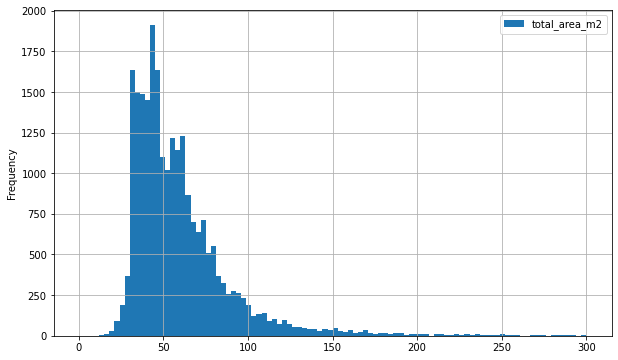

In [54]:
# Изучим общую площадь
data.plot(y = 'total_area_m2', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,300))
data['total_area_m2'].describe()
# Для красоты графиков здесь и далее определен диапазон графиков
# Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.е

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно)

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area_m2, dtype: float64

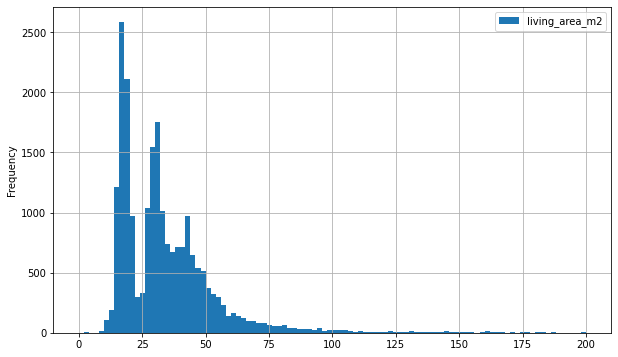

In [55]:
# Изучим жилую площадь
data.plot(y = 'living_area_m2', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,200))
data['living_area_m2'].describe()
# В общем жилая площадь колеблется от 25 до 50 м2.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area_m2, dtype: float64

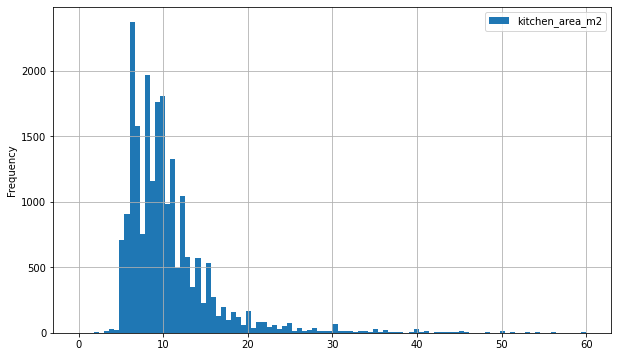

In [56]:
# Изучим площадь кухни
data.plot(y = 'kitchen_area_m2', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,60))
data['kitchen_area_m2'].describe()
# Площадь кухни - от 5 до 15 м2

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Да, соотвествует действиетльности

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

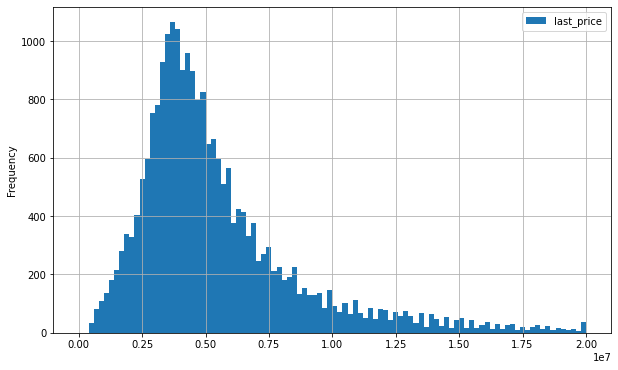

In [57]:
# Изучим цену объекта
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,20000000))
data['last_price'].describe()
# Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: number_of_rooms, dtype: float64

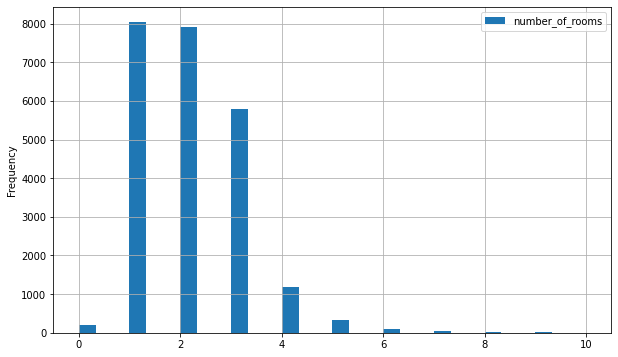

In [58]:
# Изучим количество комнат
data.plot(y = 'number_of_rooms', kind = 'hist', bins = 30, grid=True, figsize = (10,6), range = (0,10))
data['number_of_rooms'].describe()
# Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> От скольки до скольки??)

count    23650.000000
mean         2.743677
std          0.988099
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height_m, dtype: float64

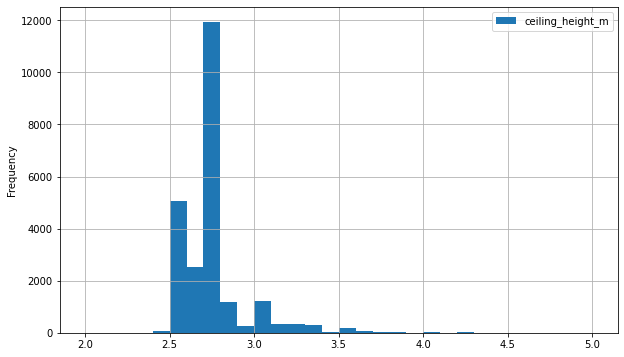

In [59]:
# Изучим высоту потолков
data.plot(y = 'ceiling_height_m', kind = 'hist', bins = 30, grid=True, figsize = (10,6), range = (2,5))
data['ceiling_height_m'].describe()
# Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо)

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

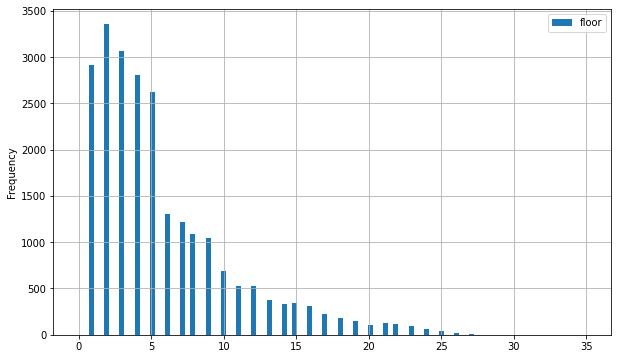

In [60]:
# изучим этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,35))
data['floor'].describe()
# Квартир на этажах > 5 меньше в выборке

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Верно

,mean,count,median
floor_status,,,
другой,103508.033401,17408,98305.435
первый,81989.310038,2912,81236.815
последний,93378.957679,3330,87763.150


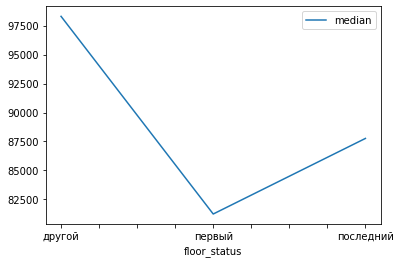

In [61]:
# Изучим тип этажа квартиры
pivot_table_floor_category = data.pivot_table(index = 'floor_status', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category
# Посчитано по цене за квадратный метр - график нагляднее
# Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: total_floors_in_house, dtype: float64

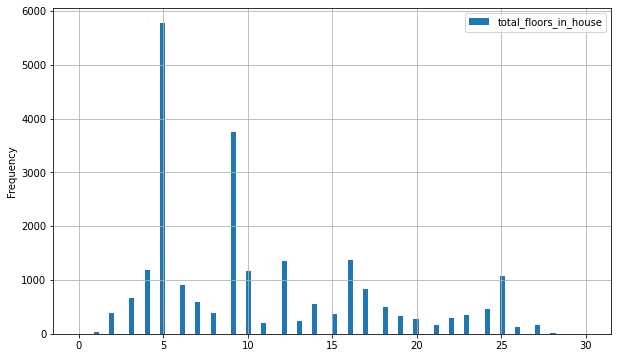

In [62]:
# Изучим общее количество этажей в доме
data.plot(y = 'total_floors_in_house', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,30))
data['total_floors_in_house'].describe()
# Наиболее распространённое количество этажей - панельки, как в треке Хаски

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо

count    18139.000000
mean        14.192403
std          8.615359
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_center_distance_km, dtype: float64

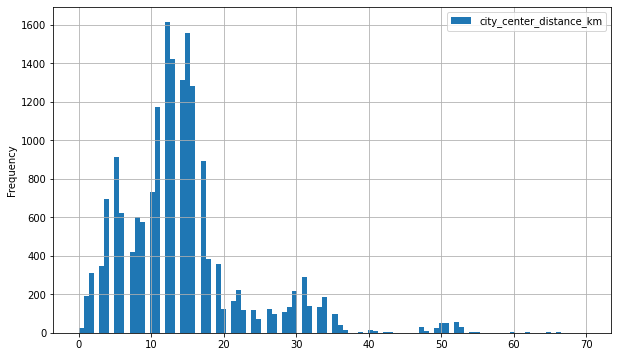

In [63]:
# Изучим расстояние до центра города - в км (до этого специально в них и переводили)
data.plot(y = 'city_center_distance_km', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,70))
data['city_center_distance_km'].describe()
# Больше всего квартир в радиусе ~20 км от центра города

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно

count    18116.000000
mean        28.803240
std         12.637314
min          0.000000
25%         18.580000
50%         26.760000
75%         37.290000
max         84.870000
Name: nearest_airport_distance_km, dtype: float64

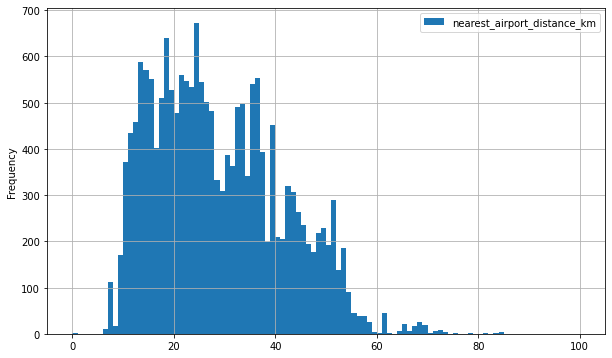

In [64]:
# Изучим расстояние до ближайшего аэропорта
data.plot(y = 'nearest_airport_distance_km', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,100))
data['nearest_airport_distance_km'].describe()
# В целом - адекватное расстояние, в среднем от 30 до 40 км

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично

count    8064.000000
mean        0.490801
std         0.342642
min         0.000000
25%         0.290000
50%         0.455000
75%         0.610000
max         3.190000
Name: nearest_park_distance_km, dtype: float64

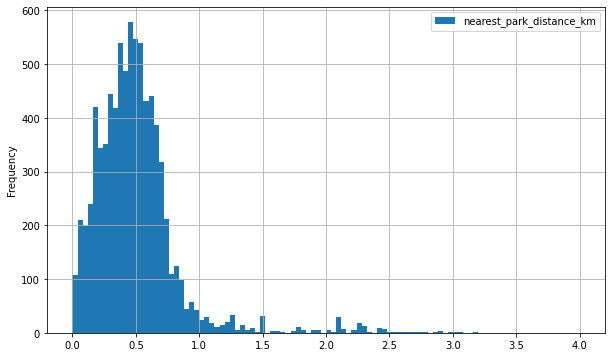

In [65]:
# Изучим расстояние до ближайшего парка
data.plot(y = 'nearest_park_distance_km', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,4))
data['nearest_park_distance_km'].describe()
# Большинство квартир - с шаговой доступностью до парка

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично

,mean,count,median
day_of_week_exposition,,,
Tuesday,99724.551947,4175,95634.100
Wednesday,99605.973825,3966,95473.810
Thursday,100193.163915,4286,95152.585
Monday,99470.371204,3606,94703.960
Friday,98987.215358,3992,94608.145
Sunday,97763.149486,1692,94594.590
Saturday,99066.258169,1933,93548.390


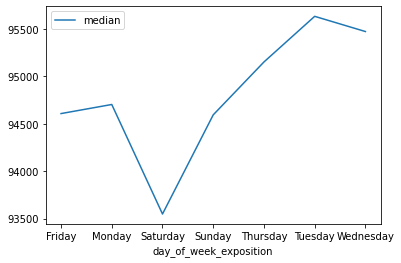

In [66]:
# Изучим день публикации объявления
pivot_table_weekday_exposition = data.pivot_table(index = 'day_of_week_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Здесь рекомендую брать bar, а не линию, так результат будет ближе к истине

,mean,count,median
month_exposition,,,
April,101956.699558,2373,96451.610
August,100147.231975,1742,96103.240
November,99254.440803,2367,95625.000
September,100490.822592,1979,95608.780
March,98997.838393,2582,95293.470
January,99838.433870,1491,95209.580
July,99650.840734,1690,95023.945
February,98769.773335,2639,95000.000
December,99501.624628,1638,94238.400


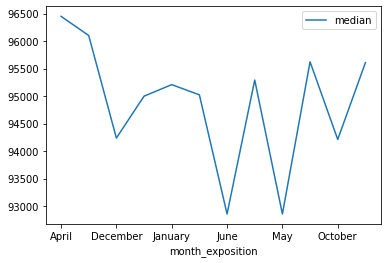

In [67]:
#изучим месяц публикации объявления
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Тоже можно взять bar

,mean,count,median
year_exposition,,,
2014,124302.355882,136,106901.90
2019,107123.780215,2879,103305.79
2018,97800.065875,8512,95704.32
2015,104719.098517,1173,93396.23
2017,97637.360194,8185,92569.66
2016,98295.372597,2765,91666.67


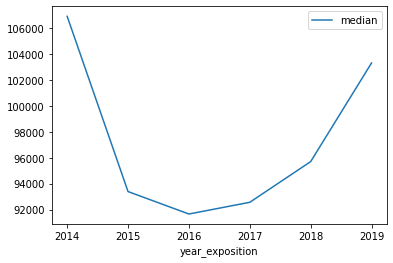

In [68]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> B pltcm nj;t)

Выводы: 
- чем ближе ко вторнику выставлены объявления, тем в среднем выше стоимость, но незначительно, а по субботам стоимость самая низкая - зависит от общей активности людей, так как именно в рабочие дни цены выше
- самая высокая стоимость квадратного метра в апреле и августе, самая низкая стоимость в мае и июне - связанно с сезонностью - в начале лета наименьшее предложение как по количеству, так и по стоимости недвижимости. Возможжно, это связано с отпусками.
- цена с 2014-2016 планомерно снижалась (а в 14 мог быть ажиотаж - курс рубля падал)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хороший вывод, молодец

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

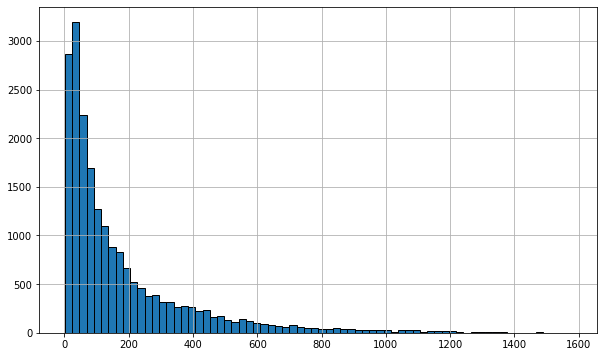

In [69]:
# Посмотрим, как быстро продавались квартиры
data['days_exposition'].hist(bins=70, figsize=(10,6), ec='black')
data[data['days_exposition']!=0]['days_exposition'].describe()
# В среднем квартиры продаются полгода, медиана - 95 дней
# Есть и такая квартира, которая продаётся 5 лет - вполне возможно!
# Большая часть квартир продавалась в течение первых 50 дней

<AxesSubplot:>

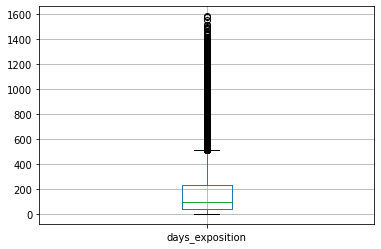

In [70]:
# посмотрим на boxplot и сузим выборку для исключения выбросов
data.boxplot(column='days_exposition')

<AxesSubplot:>

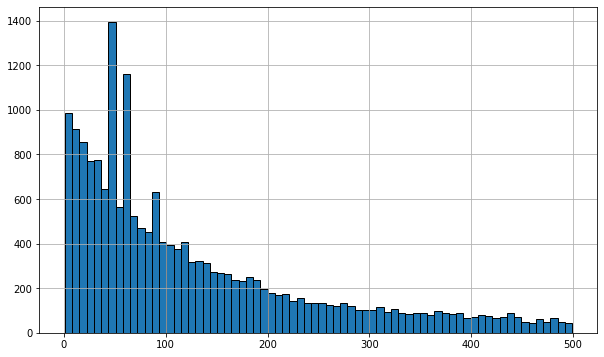

In [71]:
data.query('days_exposition < 500')['days_exposition'].hist(bins=70, figsize=(10,6), ec='black')
# Какие неприятные пики на 45 и 60 дней, посмотрим подробнее

<AxesSubplot:>

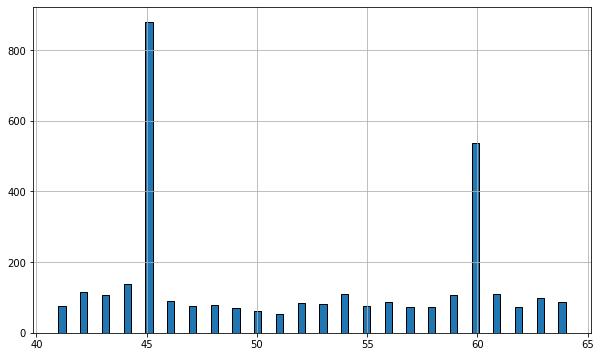

In [72]:
data.query('40 < days_exposition < 65')['days_exposition'].hist(bins=70, figsize=(10,6), ec='black')

Гугл дал ответ на вопрос - Яндекс.Недвижимость снимает с публикации объявления на 45 и 60 дни - уберём их из среза и посмотрим на данные без искажений

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично! Это то, что нужно)

<AxesSubplot:>

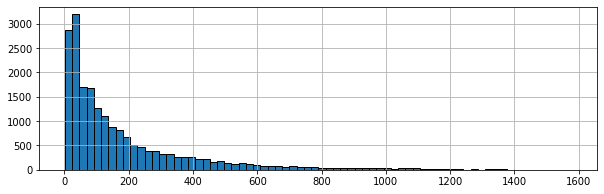

In [73]:
data.query('days_exposition != 45 and days_exposition != 60')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')
# Пиков нет, всё фруктово

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [74]:
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.70,3,0,8,16.0,False,False,False,20,13000000.0,2019-03-07,Thursday,March,2019,NaN,16.0,18.86,1.0,0.48,2.0,0.76,другой,120370.37
1,поселок шушары,40.4,18.6,11.0,2.70,1,2,1,11.0,False,False,False,7,3350000.0,2018-12-04,Tuesday,December,2018,81.0,19.0,12.82,0.0,NaN,0.0,NaN,первый,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.70,2,0,4,5.0,False,False,False,10,5196000.0,2015-08-20,Thursday,August,2015,558.0,14.0,21.74,1.0,0.09,2.0,0.57,другой,92785.71
3,санкт-петербург,159.0,NaN,NaN,2.70,3,0,9,14.0,False,False,False,0,64900000.0,2015-07-24,Friday,July,2015,424.0,7.0,28.10,2.0,0.08,3.0,0.23,другой,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.03,2,0,13,14.0,False,False,False,2,10000000.0,2018-06-19,Tuesday,June,2018,121.0,8.0,31.86,2.0,0.11,1.0,0.05,другой,100000.00


,total_area_m2,last_price
total_area_m2,1.000000,0.653743
last_price,0.653743,1.000000


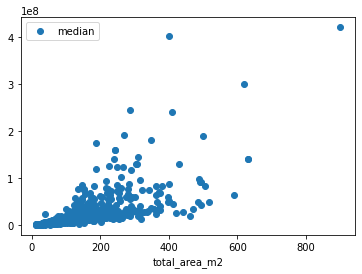

In [75]:
# Зависимость от общей площади;
pivot_table_total_area = data.pivot_table(index = 'total_area_m2', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

data[['total_area_m2', 'last_price']].corr()
# Чем больше площадь, тем выше стоимость - всё корректно

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Согласен

,living_area_m2,last_price
living_area_m2,1.000000,0.566517
last_price,0.566517,1.000000


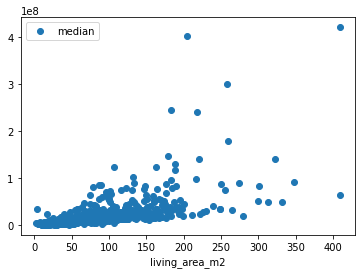

In [76]:
# Зависимость от жилой площади;
pivot_table_living_area_m2 = data.pivot_table(index = 'living_area_m2', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area_m2.columns = ['mean', 'count', 'median']
pivot_table_living_area_m2.plot(y = 'median', style = 'o')

data[['living_area_m2', 'last_price']].corr()
# Аналогично

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Так и должно быть

,kitchen_area_m2,last_price
kitchen_area_m2,1.000000,0.520233
last_price,0.520233,1.000000


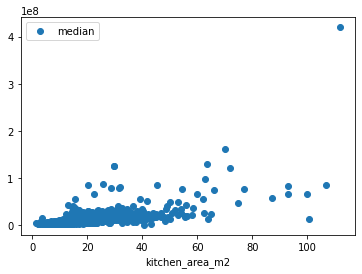

In [77]:
# Зависимость от площади кухни;
pivot_table_kitchen_area_m2 = data.pivot_table(index = 'kitchen_area_m2', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area_m2.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area_m2.plot(y = 'median', style = 'o')

data[['kitchen_area_m2', 'last_price']].corr()
# В среднем цена схожа на квартиры с 20-40-метровой кухней, но вывод аналогичен двум выше. В целом - логично

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Да, это же тоже площадь

,number_of_rooms,price_per_meter
number_of_rooms,1.000000,0.055471
price_per_meter,0.055471,1.000000


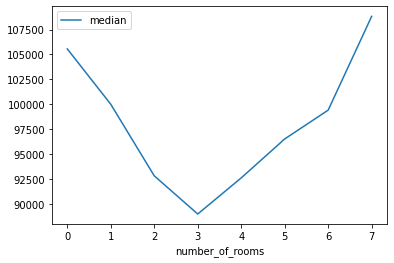

In [78]:
# Зависимость от количества комнат
pivot_table_number_of_rooms = data.pivot_table(index = 'number_of_rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_number_of_rooms.columns = ['mean', 'count', 'median']
pivot_table_number_of_rooms.query('count > 50').plot(y = 'median')

data[['number_of_rooms', 'price_per_meter']].corr()
# Трехкомнатные квартиры - самая низкая стоимость квадратного метра

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А почему здесь мы взяли не цену квартиры, а цену квадратного метра?

,mean,count,median
floor_status,,,
другой,6.675825e+06,17408,4850000.0
первый,4.800465e+06,2912,3900000.0
последний,7.359138e+06,3330,4300000.0


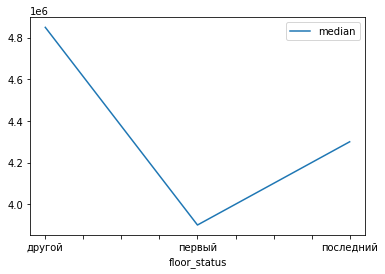

In [79]:
# Зависимость от этажа
pivot_table_floor_status = data.pivot_table(index = 'floor_status', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_status.columns = ['mean', 'count', 'median']
pivot_table_floor_status.plot(y = 'median')

pivot_table_floor_status
# Квартиры на первом этаже - дешевле

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

,mean,count,median
day_of_week_exposition,,,
Tuesday,6.393782e+06,4175,4720000.0
Wednesday,6.626416e+06,3966,4700000.0
Monday,6.510815e+06,3606,4650000.0
Thursday,6.711767e+06,4286,4650000.0
Friday,6.364605e+06,3992,4577500.0
Saturday,6.982510e+06,1933,4575000.0
Sunday,6.249360e+06,1692,4550000.0


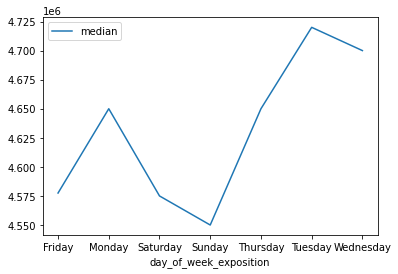

In [80]:
# Зависимость от дня объявления
pivot_table_day_of_week_exposition = data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_week_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_of_week_exposition.plot(y = 'median')

pivot_table_day_of_week_exposition.sort_values('median', ascending = False)
# Самый успешный день для подачи объявления - вторник

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Вот здесь тоже уместно брать bar)

,mean,count,median
month_exposition,,,
April,6.742671e+06,2373,4800000.0
November,6.461458e+06,2367,4700000.0
September,6.828471e+06,1979,4700000.0
December,7.005343e+06,1638,4695000.0
February,6.464463e+06,2639,4650000.0
July,6.641336e+06,1690,4650000.0
March,6.362919e+06,2582,4650000.0
January,6.666975e+06,1491,4600000.0
August,6.352839e+06,1742,4570000.0


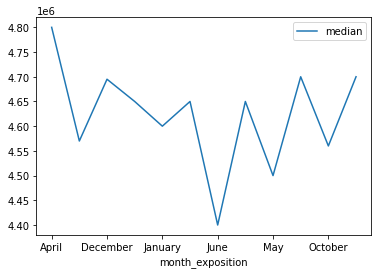

In [81]:
# Зависимость от месяца объявления
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)
# Самая высокая стоимость метра в апреле и августе
# Самая низкая стоимость в мае и июне
# В принципе, объясняется сезонностью: горячий сезон - весна и осень, летом - упадок

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Да, и здесь

,mean,count,median
year_exposition,,,
2014,1.204660e+07,136,7640000.0
2015,8.592727e+06,1173,5350000.0
2019,6.782388e+06,2879,5050000.0
2016,6.829415e+06,2765,4550000.0
2018,5.952216e+06,8512,4550000.0
2017,6.585822e+06,8185,4500000.0


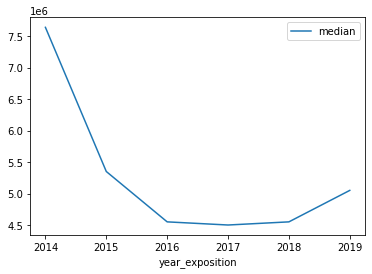

In [82]:
# Зависимость от года объявления
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)
# В среднем с учётом того, что сегментация рынка не рассматривалась
# Можно сказать, что цена с 2014-2016 планомерно снижалась (а в 14 мог быть ажиотаж - курс рубля падал)
# Также стоимость аналогичных квартир от года к году может абсолютно меняться

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> И здесь)

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [83]:
data['town_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: town_name, dtype: int64

In [84]:
# в список
town_name_short = data['town_name'].value_counts()
# срез 10 значений
town_name_short = town_name_short[0:10]
town_name_short

rating_town_name = pd.DataFrame()
for i in range(len(town_name_short)):
    name= town_name_short.index[i]
    qty= town_name_short[i]
    mean= data.query('town_name == @name').price_per_meter.mean()
    print()
    print('В ', name, "всего", qty, "объявлений со средней ценой метра", mean)
    
    new_row = {'city':name, 'qty':qty, 'mean':mean}
    
    rating_town_name = rating_town_name.append(new_row, ignore_index=True)


В  санкт-петербург всего 15721 объявлений со средней ценой метра 114849.00879333376

В  поселок мурино всего 556 объявлений со средней ценой метра 85681.76257194244

В  поселок шушары всего 440 объявлений со средней ценой метра 78677.3643181818

В  всеволожск всего 398 объявлений со средней ценой метра 68654.47396984925

В  пушкин всего 369 объявлений со средней ценой метра 103125.81937669375

В  колпино всего 338 объявлений со средней ценой метра 75424.57911242604

В  поселок парголово всего 327 объявлений со средней ценой метра 90175.91308868502

В  гатчина всего 307 объявлений со средней ценой метра 68746.14651465797

В  деревня кудрово всего 299 объявлений со средней ценой метра 92473.54755852843

В  выборг всего 237 объявлений со средней ценой метра 58141.909324894514


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер, то, что нужно

In [85]:
rating_town_name

,city,mean,qty
0,санкт-петербург,114849.008793,15721.0
1,поселок мурино,85681.762572,556.0
2,поселок шушары,78677.364318,440.0
3,всеволожск,68654.473970,398.0
4,пушкин,103125.819377,369.0
5,колпино,75424.579112,338.0
6,поселок парголово,90175.913089,327.0
7,гатчина,68746.146515,307.0
8,деревня кудрово,92473.547559,299.0
9,выборг,58141.909325,237.0


In [86]:
rating_town_name.describe()

,mean,qty
count,10.000000,10.000000
mean,83595.052463,1899.200000
std,17215.187365,4857.280076
min,58141.909325,237.000000
25%,70415.754664,312.000000
50%,82179.563445,353.500000
75%,91899.138941,429.500000
max,114849.008793,15721.000000


In [87]:
town_name_pivot_table = data.pivot_table(index = 'town_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
town_name_pivot_table.columns = ['count', 'mean']
town_name_pivot_table = town_name_pivot_table.sort_values('count', ascending = False).head(10)
town_name_pivot_table

#самая высокая стоимость
town_name_pivot_table[town_name_pivot_table['mean']==town_name_pivot_table['mean'].max()]

,count,mean
town_name,,
санкт-петербург,15721,114849.008793


In [88]:
town_name_pivot_table = data.pivot_table(index = 'town_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
town_name_pivot_table.columns = ['count', 'mean']
town_name_pivot_table = town_name_pivot_table.sort_values('count', ascending = False).head(10)
town_name_pivot_table

#самая низкая стоимость
town_name_pivot_table[town_name_pivot_table['mean']==town_name_pivot_table['mean'].min()]

,count,mean
town_name,,
выборг,237,58141.909325


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, абсолюнто верно

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,price_per_meter
city_center_distance_km,
0,245833.530370
1,177005.407604
2,157849.007290
3,121448.735845
4,133528.354741
5,140276.624092
6,151143.572935
7,156221.286986
8,125559.012612


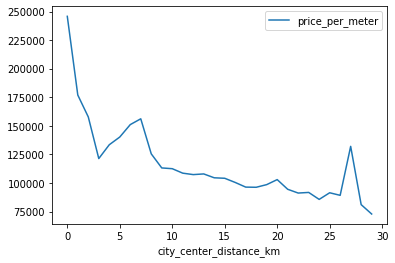

In [89]:
# Заполним пропуски маркером и отфильтруем их
data['city_center_distance_km'] = data['city_center_distance_km'].fillna(999999)
data['city_center_distance_km'] = data['city_center_distance_km'].astype('int')
pivot_table_km = data.query('town_name == "санкт-петербург" and city_center_distance_km !=999999').pivot_table(index = 'city_center_distance_km', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Вывод: 
- Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 20 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра - предположительно из - за квартир в "элитных районах" - исторических, например.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошая работа, молодец

### Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 
Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 
Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. 
Мы выявили. что в среднем большая часть квартир продавалась в течение первых 50 дней
Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру, площадь. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения - связано с сезонностью.
Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. 
Возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному.
Несмотря на общую "загрязнённость" данных, результаты исследования показательны.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Достойный вывод!

P.S. Потратила на проект больше двух недель, надеюсь, что критичных замечаний нет и проект можно считать успешно выполненным (я крайне на это рассчитываю - совершенно нет времени на правки). Обещаю исправиться в следующем проекте и держу пальцы крестиком :)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Очень рад, что ты уделила столько времени проекту, это важно. Но пообещай, что все желтые комменты исправишь. Они с большим красным оттенком ;)

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Ольга, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Нет поиска явных дубликатов

    2. Рассмотрены не все столбцы с пропусками, отметил это красным комментом

    3. Не удалены выбросы из столбцов

    3. В исследовательском анализе не везде взята конечная цена квартиры. Вместо нее фигурирует цена квадратного метра
    
    
**Удачи и жду твой проект на повторное ревью!**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод